In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
custsup = pd.read_csv('customer_signups.csv')
custsup.head()

,customer_id,name,email,signup_date,source,region,plan_selected,marketing_opt_in,age,gender
0,CUST00000,Joshua Bryant,NaN,NaN,Instagram,NaN,basic,No,34,Female
1,CUST00001,Nicole Stewart,nicole1@example.com,02-01-24,LinkedIn,West,basic,Yes,29,Male
2,CUST00002,Rachel Allen,rachel2@example.com,03-01-24,Google,North,PREMIUM,Yes,34,Non-Binary
3,CUST00003,Zachary Sanchez,zachary3@mailhub.org,04-01-24,YouTube,NaN,Pro,No,40,Male
4,CUST00004,NaN,matthew4@mailhub.org,05-01-24,LinkedIn,West,Premium,No,25,Other


In [3]:
custsup.shape

(300, 10)

In [4]:
custsup.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300 entries, 0 to 299
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   customer_id       298 non-null    object
 1   name              291 non-null    object
 2   email             266 non-null    object
 3   signup_date       298 non-null    object
 4   source            291 non-null    object
 5   region            270 non-null    object
 6   plan_selected     292 non-null    object
 7   marketing_opt_in  291 non-null    object
 8   age               288 non-null    object
 9   gender            292 non-null    object
dtypes: object(10)
memory usage: 23.6+ KB


In [5]:
print(custsup.dtypes)

customer_id         object
name                object
email               object
signup_date         object
source              object
region              object
plan_selected       object
marketing_opt_in    object
age                 object
gender              object
dtype: object


In [6]:
total = custsup.isnull().sum()
print('total missing values =', np.sum(total))

total missing values = 123


In [7]:
#duplicate values
duplicate = custsup.duplicated().sum()
print('Number of duplicate rows:', duplicate)

Number of duplicate rows: 0


In [8]:
custsup2 = custsup.dropna()

In [9]:
total = custsup2.isnull().sum()
print('total missing values after dropping =', np.sum(total))

total missing values after dropping = 0


In [10]:
custsup2.shape

(196, 10)

In [11]:
total 

customer_id         0
name                0
email               0
signup_date         0
source              0
region              0
plan_selected       0
marketing_opt_in    0
age                 0
gender              0
dtype: int64

In [12]:
custsup2['signup_date'] = pd.to_datetime(custsup2['signup_date'], errors='coerce')
custsup2['age'] = pd.to_numeric(custsup2['age'], errors='coerce').fillna(0).astype(int)
custsup2['name'] = custsup2['name'].astype(str)

C:\Users\BeanyAgads\AppData\Local\Temp\ipykernel_37176\3254862835.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  custsup2['signup_date'] = pd.to_datetime(custsup2['signup_date'], errors='coerce')
C:\Users\BeanyAgads\AppData\Local\Temp\ipykernel_37176\3254862835.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  custsup2['age'] = pd.to_numeric(custsup2['age'], errors='coerce').fillna(0).astype(int)
C:\Users\BeanyAgads\AppData\Local\Temp\ipykernel_37176\3254862835.py:3: SettingWithCopyWarning: 
A value 

In [ ]:

custsup2.describe()

,age
count,196.000000
mean,36.387755
std,17.535682
min,0.000000
25%,25.000000
50%,34.000000
75%,47.000000
max,206.000000


In [14]:
#duplicate values
duplicates = custsup2.duplicated().sum()
print('Number of duplicate rows:', duplicates)

Number of duplicate rows: 0


In [15]:
#duplicate values based on 'customer_id'
duplicates_id = custsup2.duplicated(subset=['customer_id']).sum()
print('Number of duplicate rows based on customer_id:', duplicates_id)  

Number of duplicate rows based on customer_id: 0


In [16]:
#fixing inconsistent data
custsup2['gender'] = custsup2['gender'].str.strip().str.lower()
custsup2['plan_selected'] = custsup2['plan_selected'].str.strip().str.lower()

C:\Users\BeanyAgads\AppData\Local\Temp\ipykernel_37176\239294380.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  custsup2['gender'] = custsup2['gender'].str.strip().str.lower()
C:\Users\BeanyAgads\AppData\Local\Temp\ipykernel_37176\239294380.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  custsup2['plan_selected'] = custsup2['plan_selected'].str.strip().str.lower()


In [20]:
#signups per week
signuppweek = custsup2.groupby(custsup2.signup_date.dt.to_period('W')).size()
signupmonth = custsup2.groupby(custsup2.signup_date.dt.to_period('M')).size()
print('Signups per week:', np.mean(signuppweek))
print('Signups per month:', np.mean(signupmonth))

Signups per week: 4.020833333333333
Signups per month: 16.083333333333332


C:\Users\BeanyAgads\AppData\Local\Temp\ipykernel_37176\2887998818.py:2: FutureWarning: The behavior of .astype from period[W-SUN] to int32 is deprecated. In a future version, this astype will return exactly the specified dtype instead of int64, and will raise if that conversion overflows.
  a, b = np.polyfit(signuppweek.index.astype(int), signuppweek.values, 1)
C:\Users\BeanyAgads\AppData\Local\Temp\ipykernel_37176\2887998818.py:3: FutureWarning: The behavior of .astype from period[W-SUN] to int32 is deprecated. In a future version, this astype will return exactly the specified dtype instead of int64, and will raise if that conversion overflows.
  trendline = a * signuppweek.index.astype(int) + b


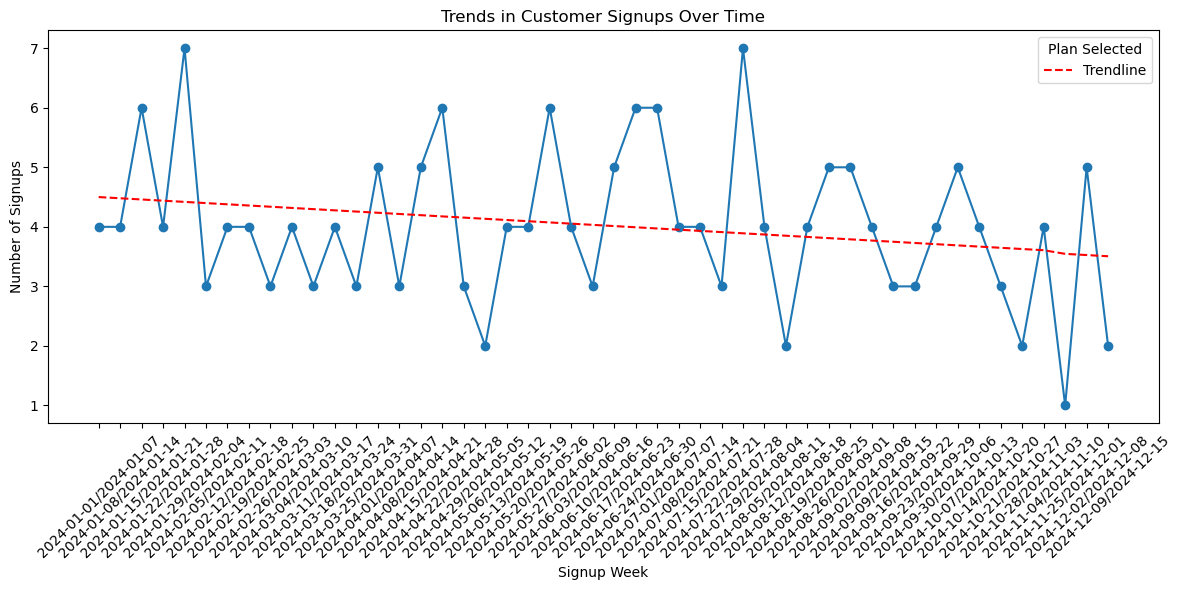

In [19]:
#duplicate values
a, b = np.polyfit(signuppweek.index.astype(int), signuppweek.values, 1)
trendline = a * signuppweek.index.astype(int) + b

#total results 
plt.figure(figsize=(12, 6))
plt.plot(signuppweek.index.astype(str), signuppweek.values, marker='o', linestyle='-')
plt.plot(signuppweek.index.astype(str), trendline, color='red', linestyle='--', label='Trendline')
plt.xticks(rotation=45)
plt.title('Trends in Customer Signups Over Time')
plt.xlabel('Signup Week')
plt.ylabel('Number of Signups')
plt.xticks(rotation=45)
plt.legend(title='Plan Selected')
plt.tight_layout()
plt.savefig('customer_signups_trends.png')
#total results
plt.show()


C:\Users\BeanyAgads\AppData\Local\Temp\ipykernel_37176\3176331843.py:1: FutureWarning: The behavior of .astype from period[M] to int32 is deprecated. In a future version, this astype will return exactly the specified dtype instead of int64, and will raise if that conversion overflows.
  a, b = np.polyfit(signupmonth.index.astype(int), signupmonth.values, 1)
C:\Users\BeanyAgads\AppData\Local\Temp\ipykernel_37176\3176331843.py:2: FutureWarning: The behavior of .astype from period[M] to int32 is deprecated. In a future version, this astype will return exactly the specified dtype instead of int64, and will raise if that conversion overflows.
  trendline = a * signupmonth.index.astype(int) + b


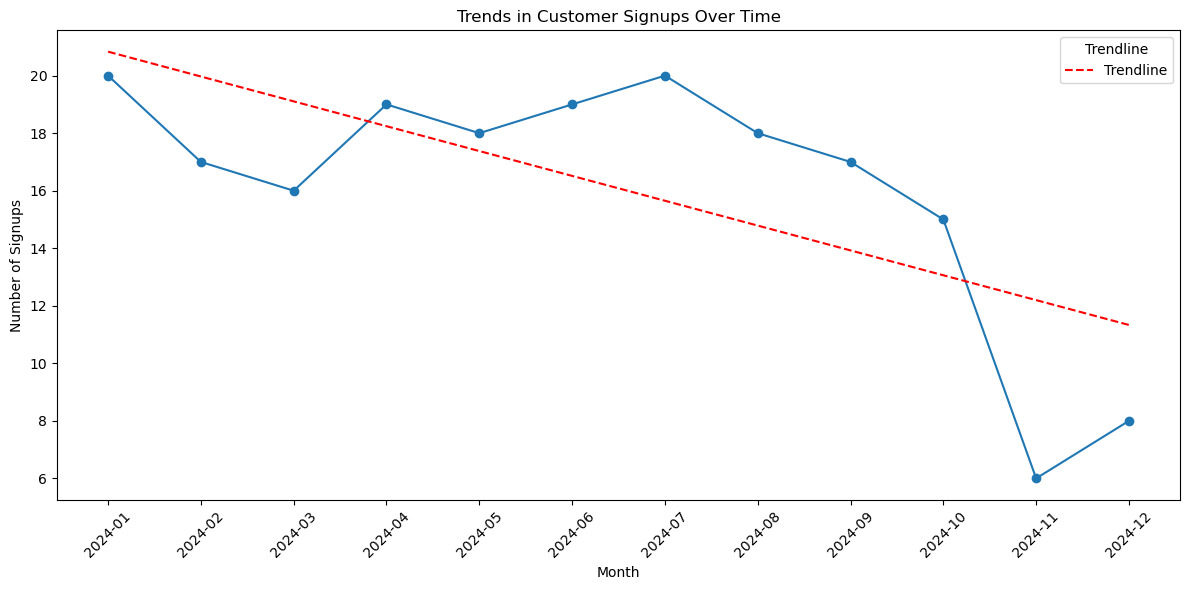

In [21]:
a, b = np.polyfit(signupmonth.index.astype(int), signupmonth.values, 1)
trendline = a * signupmonth.index.astype(int) + b

#total results 
plt.figure(figsize=(12, 6))
plt.plot(signupmonth.index.astype(str), signupmonth.values, marker='o', linestyle='-')
plt.plot(signupmonth.index.astype(str), trendline, color='red', linestyle='--', label='Trendline')
plt.xticks(rotation=45)
plt.title('Trends in Customer Signups Over Time')
plt.xlabel('Month')
plt.ylabel('Number of Signups')
plt.xticks(rotation=45)
plt.legend(title='Trendline')
plt.tight_layout()
plt.savefig('customer_signups_trendsM.png')
#total results
plt.show()

In [22]:
source_counts = custsup2['source'].value_counts()
source_signups = custsup2.groupby([custsup2['signup_date'].dt.to_period('M'),'source']).size().unstack(fill_value=0)
print(source_signups)
source_counts

source       ??  Facebook  Google  Instagram  LinkedIn  Referral  YouTube
signup_date                                                              
2024-01       0         1       4          4         3         4        4
2024-02       1         2       2          1         4         5        2
2024-03       1         3       3          3         2         0        4
2024-04       0         4       1          5         3         4        2
2024-05       0         1       4          4         4         4        1
2024-06       0         4       4          0         1         2        8
2024-07       0         1       3          5         1         3        7
2024-08       0         4       2          4         1         2        5
2024-09       2         3       1          1         5         3        2
2024-10       0         2       7          2         1         1        2
2024-11       0         1       2          1         1         1        0
2024-12       0         1       0     

YouTube      39
Google       33
Instagram    33
Referral     31
LinkedIn     28
Facebook     28
??            4
Name: source, dtype: int64

In [31]:
region_counts = custsup2['region'].value_counts()
region_counts

South      46
East       46
North      44
West       30
Central    30
Name: region, dtype: int64

In [30]:
missing_by_region = custsup[custsup['region'].isnull()]['region'].value_counts(dropna=True)

# Since all missing values are NaN, just print the total missing and show which region is most affected
print(f"Total missing 'region' values: {missing_region_count}")

# If you want to see which region is most affected in the cleaned data (custsup2), check for empty strings or unusual values
incomplete_region = custsup2['region'].value_counts(dropna=True)
print("Region value counts (including possible incomplete data):")
print(incomplete_region)

Total missing 'region' values: 30
Region value counts (including possible incomplete data):
South      46
East       46
North      44
West       30
Central    30
Name: region, dtype: int64


In [44]:
planselected_counts = custsup2['plan_selected'].value_counts()
planselected_counts

basic          68
premium        65
pro            60
unknownplan     3
Name: plan_selected, dtype: int64

<Figure size 800x500 with 0 Axes>

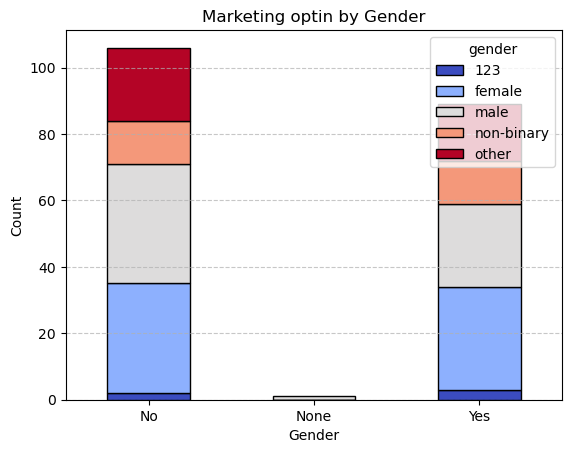

gender            123  female  male  non-binary  other
marketing_opt_in                                      
No                2.0    33.0  36.0        13.0   22.0
None              NaN     NaN   1.0         NaN    NaN
Yes               3.0    31.0  25.0        13.0   17.0


In [ ]:
#marketing opt in by gender
markgender = custsup2.groupby(['marketing_opt_in', 'gender']).size().unstack()

# Plot the graph
plt.figure(figsize=(8, 5))
markgender.plot(kind='bar', stacked=True, colormap='coolwarm', edgecolor='black')

plt.title('Marketing optin by Gender')
plt.xlabel('Decision')
plt.ylabel('Count')
plt.legend(title='gender', loc='upper right')
plt.xticks(rotation=0)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.savefig('Marketing Optin Status by Gender')
plt.show()
print(markgender)


<Figure size 800x500 with 0 Axes>

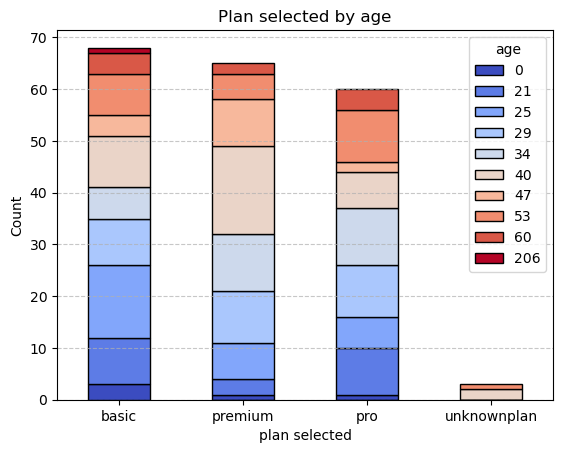

age            0    21    25    29    34    40   47    53   60   206
plan_selected                                                       
basic          3.0  9.0  14.0   9.0   6.0  10.0  4.0   8.0  4.0  1.0
premium        1.0  3.0   7.0  10.0  11.0  17.0  9.0   5.0  2.0  NaN
pro            1.0  9.0   6.0  10.0  11.0   7.0  2.0  10.0  4.0  NaN
unknownplan    NaN  NaN   NaN   NaN   NaN   2.0  NaN   1.0  NaN  NaN
plan_selected
basic          68.0
premium        65.0
pro            60.0
unknownplan     3.0
dtype: float64


In [34]:
# age by plan selected
age_plan = custsup2.groupby(['plan_selected', 'age']).size().unstack()
plt.figure(figsize=(8, 5))
age_plan.plot(kind='bar', stacked=True, colormap='coolwarm', edgecolor='black')

plt.title('Plan selected by age')
plt.xlabel('plan selected')
plt.ylabel('Count')
plt.legend(title='age', loc='upper right')
plt.xticks(rotation=0)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.savefig('plan selected by age')
plt.show()
print(age_plan)
print(np.sum(age_plan, axis=1))  # Print the total count for each plan selected

<Figure size 800x500 with 0 Axes>

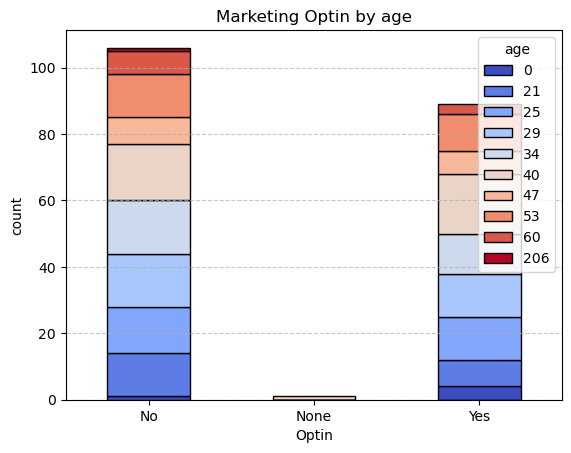

age               0     21    25    29    34    40   47    53   60   206
marketing_opt_in                                                        
No                1.0  13.0  14.0  16.0  16.0  17.0  8.0  13.0  7.0  1.0
None              NaN   NaN   NaN   NaN   NaN   1.0  NaN   NaN  NaN  NaN
Yes               4.0   8.0  13.0  13.0  12.0  18.0  7.0  11.0  3.0  NaN
marketing_opt_in
No      106.0
None      1.0
Yes      89.0
dtype: float64


In [35]:
age_optin = custsup2.groupby(['marketing_opt_in', 'age']).size().unstack()
plt.figure(figsize=(8, 5))
age_optin.plot(kind='bar', stacked=True, colormap='coolwarm', edgecolor='black')

plt.title('Marketing Optin by age')
plt.xlabel('Optin')
plt.ylabel('count')
plt.legend(title='age', loc='upper right')
plt.xticks(rotation=0)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.savefig('optin by age')
plt.show()
print(age_optin)
print(np.sum(age_optin, axis=1))  # Print the total count for each opt-in status

# Optional Stretch Task

In [36]:
 support = pd.read_csv('support_tickets.csv')
support.head()

,ticket_id,customer_id,ticket_date,issue_type,resolved
0,TKT0000-1,CUST00203,2024-08-17,Billing,Yes
1,TKT0000-2,CUST00203,2024-07-22,Technical Error,Yes
2,TKT0000-3,CUST00203,2024-07-22,Other,Yes
3,TKT0001-1,CUST00266,2024-09-26,Account Setup,Yes
4,TKT0001-2,CUST00266,2024-10-09,Technical Error,No


In [37]:
support.shape

(123, 5)

In [39]:
customer = pd.merge(custsup2, support, on='customer_id', how='left')
customer.head()

,customer_id,name,email,signup_date,source,region,plan_selected,marketing_opt_in,age,gender,ticket_id,ticket_date,issue_type,resolved
0,CUST00001,Nicole Stewart,nicole1@example.com,2024-02-01,LinkedIn,West,basic,Yes,29,male,NaN,NaN,NaN,NaN
1,CUST00002,Rachel Allen,rachel2@example.com,2024-03-01,Google,North,premium,Yes,34,non-binary,NaN,NaN,NaN,NaN
2,CUST00005,John Gonzales,john5@mailhub.org,2024-06-01,Facebook,South,premium,No,34,other,TKT0008-1,2024-06-04,Other,Yes
3,CUST00006,Crystal Mason,crystal6@mailhub.org,2024-07-01,YouTube,North,unknownplan,Yes,40,male,NaN,NaN,NaN,NaN
4,CUST00007,Michael Bailey,michael7@mailhub.org,2024-08-01,YouTube,Central,pro,Yes,60,other,TKT0036-1,2024-08-07,Billing,Yes


In [41]:
support_reg = customer.groupby(['region', 'resolved']).size().unstack()
support_reg

resolved,No,Yes
region,,
Central,3,9
East,3,16
North,2,14
South,1,14
West,3,11


In [42]:
support_plan = customer.groupby(['plan_selected', 'resolved']).size().unstack()
support_plan

resolved,No,Yes
plan_selected,,
basic,6,21
premium,2,16
pro,4,27
